# 簡単な決定木（分類）

In [0]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris() #irisデータを使って簡単な決定木を作成
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=3)#criterionをentropyにすると少し変わる
clf = clf.fit(iris.data, iris.target)

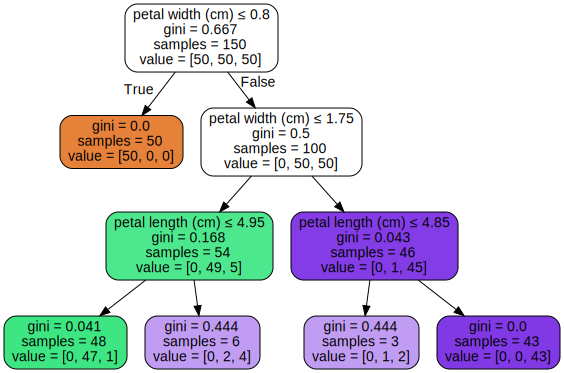

In [6]:
import graphviz #graphvizを使って可視化
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=iris.feature_names,\
                                filled=True, rounded=True,special_characters=True\
                               )
graph = graphviz.Source(dot_data)
graph
#graph.render("iris") #pdfで保存できる

In [3]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df[df.iloc[:,2]>=2.45]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 簡単な決定木（回帰）

In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0,max_depth=2,criterion="mse")
regressor = regressor.fit(boston.data, boston.target)

In [0]:
import graphviz
dot_data = tree.export_graphviz(regressor, out_file=None)
graph = graphviz.Source(dot_data)
#graph.render("boston") #さっきと同じようにpdfへ出力する場合はこれを実行

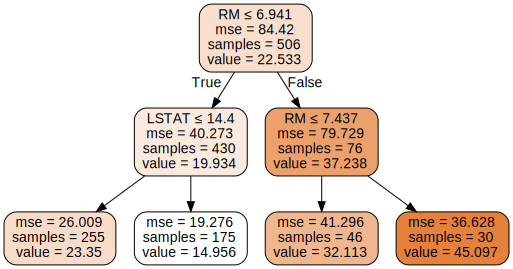

In [9]:
dot_data = tree.export_graphviz(regressor, out_file=None,feature_names=boston.feature_names,\
                                filled=True, rounded=True,special_characters=True\
                               )
graph = graphviz.Source(dot_data)
graph

In [11]:
print(regressor.predict(boston.data[:1]))
df = pd.DataFrame(boston.data[:1],columns = boston.feature_names)
df#上記の木構造に従って予測値を出力していることがわかる

[23.34980392]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


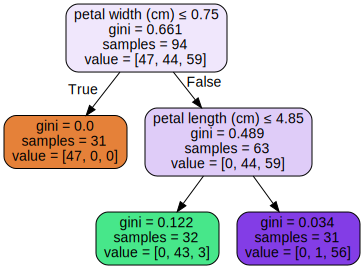

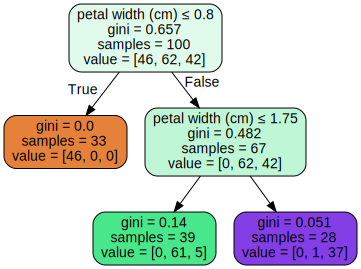

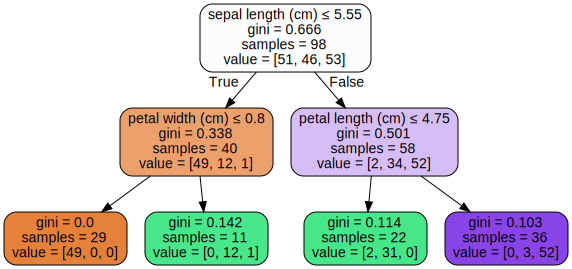

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion="gini",max_depth=2,n_estimators=3,random_state=0)
clf = clf.fit(iris.data, iris.target)
for i,val in enumerate(clf.estimators_):
    dot_data = tree.export_graphviz(clf.estimators_[i], out_file=None,feature_names=iris.feature_names,\
                                filled=True, rounded=True,special_characters=True\
                               )
    graph = graphviz.Source(dot_data)
    display(graph)#ランダムフォレストで作られた木をすべて見る

# 勾配ブースティング実装（回帰問題）

In [0]:
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
import pandas as pd
import graphviz
from sklearn.metrics import mean_squared_error
lr=1#学習率の設定（変えても以降変わらないが、どこの計算式に代入されるかは分かる）

In [19]:
x = np.array([[5,82],[7,80],[12,103],[23,118],\
              [25,172],[28,127],[29,204],[34,189],[35,99],\
              [40,166]])
df = pd.DataFrame(x,columns=["Years","Salary"])
df#疑似データを作り、この勾配＝残差を用いてブースティングする

,Years,Salary
0,5,82
1,7,80
2,12,103
3,23,118
4,25,172
5,28,127
6,29,204
7,34,189
8,35,99
9,40,166


In [20]:
df["x"] = df["Years"]
df["y"] = df["Salary"]
del df["Years"]
del df["Salary"]
df["F0"] = df["y"].mean()
df["y-F0"] = df["y"] - df["F0"]
display(df)
print(mean_squared_error(df["y"],df["F0"]))#平均でなべて、その残差に以降フィッティングさせていく

,x,y,F0,y-F0
0,5,82,134.0,-52.0
1,7,80,134.0,-54.0
2,12,103,134.0,-31.0
3,23,118,134.0,-16.0
4,25,172,134.0,38.0
5,28,127,134.0,-7.0
6,29,204,134.0,70.0
7,34,189,134.0,55.0
8,35,99,134.0,-35.0
9,40,166,134.0,32.0


1850.4


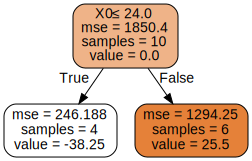

In [22]:
clf = tree.DecisionTreeRegressor(max_depth=1)
clf = clf.fit(df["x"].values.reshape(-1,1), df["y-F0"])#残差にフィッティング
dot_data = tree.export_graphviz(clf, out_file=None,\
                                filled=True, rounded=True,special_characters=True\
                               )
graph = graphviz.Source(dot_data)
graph

In [24]:
df["h1"] = 0
df["h1"] = df["h1"].mask(df["x"]<=24,-38.25)#手で、条件に従って一個ずつmaskしていく
df["h1"] = df["h1"].mask(df["x"]>24,25.5)
df["F1"] = df["F0"] + lr*df["h1"]#learning_rateはここで掛けられる
df["y-F1"] = df["y"] - df["F1"]
print(mean_squared_error(df["y"],df["F1"]))
df#フィッティングさせた結果を足し合わせて現時点での予測値を出す（F1)

875.025


,x,y,F0,y-F0,h1,F1,y-F1
0,5,82,134.0,-52.0,-38.25,95.75,-13.75
1,7,80,134.0,-54.0,-38.25,95.75,-15.75
2,12,103,134.0,-31.0,-38.25,95.75,7.25
3,23,118,134.0,-16.0,-38.25,95.75,22.25
4,25,172,134.0,38.0,25.50,159.50,12.50
5,28,127,134.0,-7.0,25.50,159.50,-32.50
6,29,204,134.0,70.0,25.50,159.50,44.50
7,34,189,134.0,55.0,25.50,159.50,29.50
8,35,99,134.0,-35.0,25.50,159.50,-60.50
9,40,166,134.0,32.0,25.50,159.50,6.50


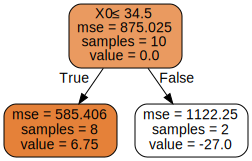

692.775


,x,y,F0,y-F0,h1,F1,y-F1,h2,F2,y-F2
0,5,82,134.0,-52.0,-38.25,95.75,-13.75,6.75,102.50,-20.50
1,7,80,134.0,-54.0,-38.25,95.75,-15.75,6.75,102.50,-22.50
2,12,103,134.0,-31.0,-38.25,95.75,7.25,6.75,102.50,0.50
3,23,118,134.0,-16.0,-38.25,95.75,22.25,6.75,102.50,15.50
4,25,172,134.0,38.0,25.50,159.50,12.50,6.75,166.25,5.75
5,28,127,134.0,-7.0,25.50,159.50,-32.50,6.75,166.25,-39.25
6,29,204,134.0,70.0,25.50,159.50,44.50,6.75,166.25,37.75
7,34,189,134.0,55.0,25.50,159.50,29.50,6.75,166.25,22.75
8,35,99,134.0,-35.0,25.50,159.50,-60.50,-27.00,132.50,-33.50
9,40,166,134.0,32.0,25.50,159.50,6.50,-27.00,132.50,33.50


In [25]:
clf = tree.DecisionTreeRegressor(max_depth=1)
clf = clf.fit(df["x"].values.reshape(-1,1), df["y-F1"])#同じ作業を繰り返す
dot_data = tree.export_graphviz(clf, out_file=None,\
                                filled=True, rounded=True,special_characters=True\
                               )
graph = graphviz.Source(dot_data)
display(graph)
df["h2"] = 0
df["h2"] = df["h2"].mask(df["x"]<=34.5,6.75)
df["h2"] = df["h2"].mask(df["x"]>34.5,-27)
df["F2"] = df["F1"] + lr*df["h2"]
df["y-F2"] = df["y"] - df["F2"]
print(mean_squared_error(df["y"],df["F2"]))
df

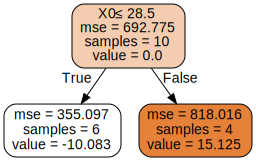

540.2645834


,x,y,F0,y-F0,h1,F1,y-F1,h2,F2,y-F2,h3,F3,y-F3
0,5,82,134.0,-52.0,-38.25,95.75,-13.75,6.75,102.50,-20.50,-10.083,92.417,-10.417
1,7,80,134.0,-54.0,-38.25,95.75,-15.75,6.75,102.50,-22.50,-10.083,92.417,-12.417
2,12,103,134.0,-31.0,-38.25,95.75,7.25,6.75,102.50,0.50,-10.083,92.417,10.583
3,23,118,134.0,-16.0,-38.25,95.75,22.25,6.75,102.50,15.50,-10.083,92.417,25.583
4,25,172,134.0,38.0,25.50,159.50,12.50,6.75,166.25,5.75,-10.083,156.167,15.833
5,28,127,134.0,-7.0,25.50,159.50,-32.50,6.75,166.25,-39.25,-10.083,156.167,-29.167
6,29,204,134.0,70.0,25.50,159.50,44.50,6.75,166.25,37.75,15.125,181.375,22.625
7,34,189,134.0,55.0,25.50,159.50,29.50,6.75,166.25,22.75,15.125,181.375,7.625
8,35,99,134.0,-35.0,25.50,159.50,-60.50,-27.00,132.50,-33.50,15.125,147.625,-48.625
9,40,166,134.0,32.0,25.50,159.50,6.50,-27.00,132.50,33.50,15.125,147.625,18.375


In [26]:
clf = tree.DecisionTreeRegressor(max_depth=1)
clf = clf.fit(df["x"].values.reshape(-1,1), df["y-F2"])#同じ作業を繰り返す
dot_data = tree.export_graphviz(clf, out_file=None,\
                                filled=True, rounded=True,special_characters=True\
                               )
graph = graphviz.Source(dot_data)
display(graph)
df["h3"] = 0
df["h3"] = df["h3"].mask(df["x"]<=28.5,-10.083)
df["h3"] = df["h3"].mask(df["x"]>28.5,15.125)
df["F3"] = df["F2"] + lr*df["h3"]
df["y-F3"] = df["y"] - df["F3"]
print(mean_squared_error(df["y"],df["F3"]))
df

# XGBoost実装
learning_rate=1で勾配ブースティングしたモデル．同じことをxgbでやる場合、eta=1,lambda=0にする．微妙に値が違うのはヘッシアンまで考慮しているため

In [27]:
from sklearn.datasets import load_boston
boston = load_boston()
df2 = pd.DataFrame(boston.data,columns=boston.feature_names)
df2["y"] = boston.target
display(df2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [0]:
lr = 1

84.41955615616554


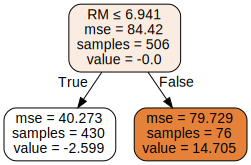

In [29]:
df2["F0"] = df2["y"].mean()
df2["y-F0"] = df2["y"] - df2["F0"]
print(mean_squared_error(df2["y"],df2["F0"]))

clf = tree.DecisionTreeRegressor(max_depth=1)
clf = clf.fit(df2.iloc[:,:13], df2["y-F0"])
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=boston.feature_names,\
                                filled=True, rounded=True,special_characters=True\
                               )
graph = graphviz.Source(dot_data)
display(graph)

46.199091701870046


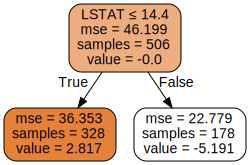

In [30]:
c = 6.941
x = "RM"
df2["h1"] = 0
df2["h1"] = df2["h1"].mask(df2[x]<=c,-2.599)
df2["h1"] = df2["h1"].mask(df2[x]>c,14.705)
df2["F1"] = df2["F0"] + lr*df2["h1"]
df2["y-F1"] = df2["y"] - df2["F1"]
print(mean_squared_error(df2["y"],df2["F1"]))

clf = tree.DecisionTreeRegressor(max_depth=1)
clf = clf.fit(df2.iloc[:,:13], df2["y-F1"])
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=boston.feature_names,\
                                filled=True, rounded=True,special_characters=True\
                               )
graph = graphviz.Source(dot_data)
display(graph)

31.577975232545423


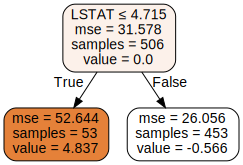

In [31]:
c = 14.4
x = "LSTAT"
df2["h2"] = 0
df2["h2"] = df2["h2"].mask(df2[x]<=c,2.817)
df2["h2"] = df2["h2"].mask(df2[x]>c,-5.191)
df2["F2"] = df2["F1"] + lr*df2["h2"]
df2["y-F2"] = df2["y"] - df2["F2"]
print(mean_squared_error(df2["y"],df2["F2"]))

clf = tree.DecisionTreeRegressor(max_depth=1)
clf = clf.fit(df2.iloc[:,:13], df2["y-F2"])
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=boston.feature_names,\
                                filled=True, rounded=True,special_characters=True\
                               )
graph = graphviz.Source(dot_data)
display(graph)

In [32]:
c = 4.715
x = "LSTAT"
df2["h3"] = 0
df2["h3"] = df2["h3"].mask(df2[x]<=c,4.837)
df2["h3"] = df2["h3"].mask(df2[x]>c,-0.586)
df2["F3"] = df2["F2"] + lr*df2["h3"]
df2["y-F3"] = df2["y"] - df2["F3"]
print(mean_squared_error(df2["y"],df2["F3"]))

28.840882850606945


以降は実際にxgbのパッケージを使って答え合わせをする。
その際，値が細かいのは二次勾配まで考えているため
また，正則化項の係数は0にしないと残差が勾配として使われない

In [0]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
# データをDMatrix形式に変換
XD = xgb.DMatrix(boston.data, label=boston.target)

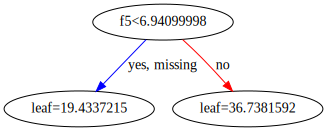

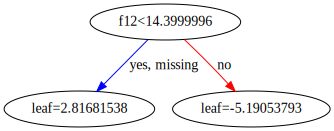

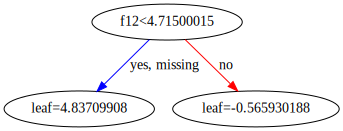

In [35]:
params = {'max_depth':1, 'learning_rate':1, 'lambda':0}
num_boost_round = 3

bst = xgb.train(params, XD, num_boost_round)

graph1 = xgb.to_graphviz(bst)
display(graph1)

graph2 = xgb.to_graphviz(bst, num_trees=1)
display(graph2)

graph3 = xgb.to_graphviz(bst, num_trees=2)
display(graph3)

分類問題に関するxgb(勾配ブースティング)は，交差エントロピーの勾配計算が煩雑になるため省略